## Importing the necessary libraries

In [1]:
# installing the library for deploying ML models
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.5 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=55

In [2]:
# libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# removing the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# setting the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 2 decimal points
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# library to split data
from sklearn.model_selection import train_test_split

# library to build ML model
from sklearn.tree import DecisionTreeClassifier

# library to tune ML model
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

# libraries to evaluate the ML model
from sklearn.metrics import f1_score, make_scorer

# libraries to deploy the ML model
import os
import joblib
import gradio as gr

## Loading the dataset

In [ ]:
# # importing using Google Colab

# # connecting Google Drive to this Python notebook
# from google.colab import drive
# drive.mount('/content/drive')

# # defining the location where the data is stored
# path = "/content/drive/MyDrive/"
# # loading the data into a Pandas dataframe
# # hotel = pd.read_csv(path+"INNHotelsGroup.csv")

In [3]:
# # importing using Jupyter Notebook

# # loading the data into a Pandas dataframe
hotel = pd.read_csv("/content/INNHotelsGroup.csv")

In [4]:
hotel.sample(10, random_state=10)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
18212,103,Offline,0,115.00,1,0,2018-04-19,0,2,Canceled
3267,86,Online,2,90.00,2,1,2018-11-04,0,2,Not_Canceled
28472,20,Online,1,92.67,2,1,2018-12-09,0,2,Not_Canceled
34178,22,Online,1,126.04,2,4,2018-12-28,0,10,Not_Canceled
35404,109,Online,4,105.21,2,2,2018-07-06,0,4,Not_Canceled
31551,30,Offline,0,127.15,1,0,2018-10-28,0,1,Not_Canceled
30927,192,Offline,0,100.00,2,0,2018-08-25,0,3,Not_Canceled
30473,278,Online,0,103.95,2,2,2018-07-16,1,1,Canceled
27445,0,Online,0,85.93,1,0,2018-05-12,0,1,Not_Canceled
33154,37,Online,1,92.31,1,4,2018-12-15,0,9,Canceled


### Exploratory Data Analysis (EDA)

In [5]:
# creating a copy of the data to avoid any changes to original data
data = hotel.copy()

In [6]:
# checking the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,36275.00,85.23,85.93,0.00,17.00,57.00,126.00,443.00
no_of_special_requests,36275.00,0.62,0.79,0.00,0.00,0.00,1.00,5.00
avg_price_per_room,36275.00,103.42,35.09,0.00,80.30,99.45,120.00,540.00
no_of_adults,36275.00,1.84,0.52,0.00,2.00,2.00,2.00,4.00
no_of_weekend_nights,36275.00,0.81,0.87,0.00,0.00,1.00,2.00,7.00
required_car_parking_space,36275.00,0.03,0.17,0.00,0.00,0.00,0.00,1.00
no_of_week_nights,36275.00,2.20,1.41,0.00,1.00,2.00,3.00,17.00


* The number of adults ranges from 0 to 4, which is usual.
* The range of the number of weeks and weekend nights seems fine. Though 7 weekends might be a very long stay.
* At least 75% of the customers do not require car parking space.
* On average the customers book 85 days in advance. There's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in this column.
* The average price per room is 103 euros. There's a huge difference between the 75th percentile and the maximum value which indicates there might be outliers present in this column.

In [7]:
# defining a function to create a bar graph with percentage values

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=15,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    # increase the size of x-axis and y-axis scales
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

    # setting axis labels
    ax.set_xlabel(feature.replace('_', ' ').title(), fontsize=15)
    ax.set_ylabel('')

    # show the plot
    plt.show()

In [8]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(loc="upper left", fontsize=12, bbox_to_anchor=(1, 1))

    # setting the formatting for x-axis
    plt.xticks(fontsize=15, rotation=0)
    plt.xlabel(predictor.replace('_', ' ').title(), fontsize=15)
    # setting the formatting for y-axis
    plt.yticks(fontsize=15)
    # show the plot
    plt.show()

<ipython-input-7-2c30a2d9de1f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


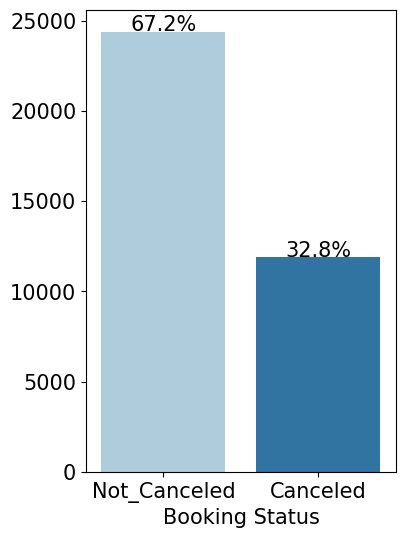

In [9]:
# visualizing the number of cancelled bookings
labeled_barplot(data, "booking_status", perc=True)

- Approx. one-third of the bookings were canceled

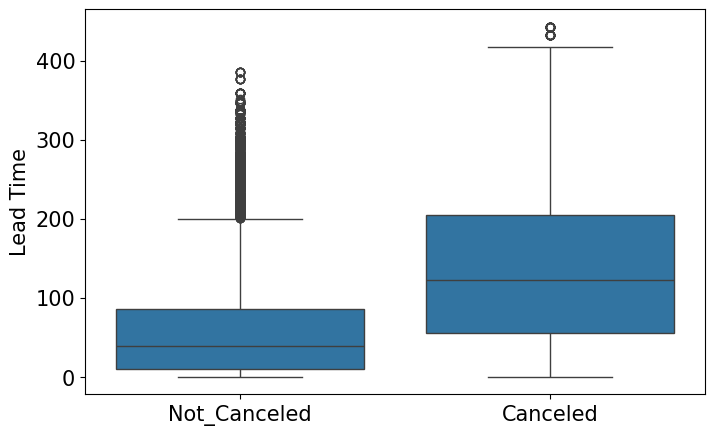

In [10]:
# visualizing the relationship between lead time and booking cancellation
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="booking_status", y="lead_time")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('Lead Time', fontsize=15);

- The higher the lead time, higher is the chances of cancellation

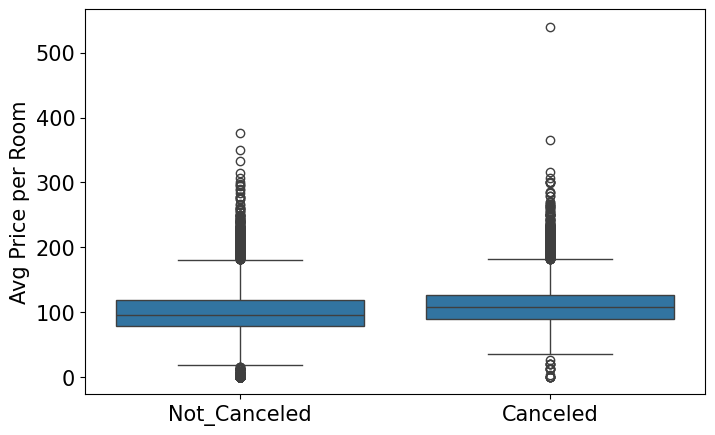

In [11]:
# visualizing the relationship between avg room price and booking cancellation
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="booking_status", y="avg_price_per_room")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('Avg Price per Room', fontsize=15);

- The booking status marginally varies with the average price per room

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
Offline                  3153          7375  10528
Online                   8732         17015  25747
All                     11885         24390  36275
------------------------------------------------------------------------------------------------------------------------


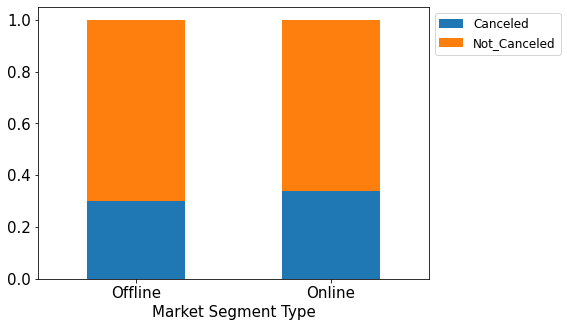

In [ ]:
stacked_barplot(data, "market_segment_type", "booking_status")

* Offline bookings have witnessed a slightly lower rate of cancellation compared to online bookings

In [12]:
# converting the 'arrival_date' column to datetime type
data['arrival_date'] = pd.to_datetime(data['arrival_date'])

# extracting month from 'arrival_date'
data['arrival_month'] = data['arrival_date'].dt.month

In [13]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count().to_frame().reset_index()
monthly_data.columns = ['Month', 'Bookings']
monthly_data

,Month,Bookings
0,1,1014
1,2,1704
2,3,2358
3,4,2736
4,5,2598
5,6,3203
6,7,2920
7,8,3813
8,9,4611
9,10,5317


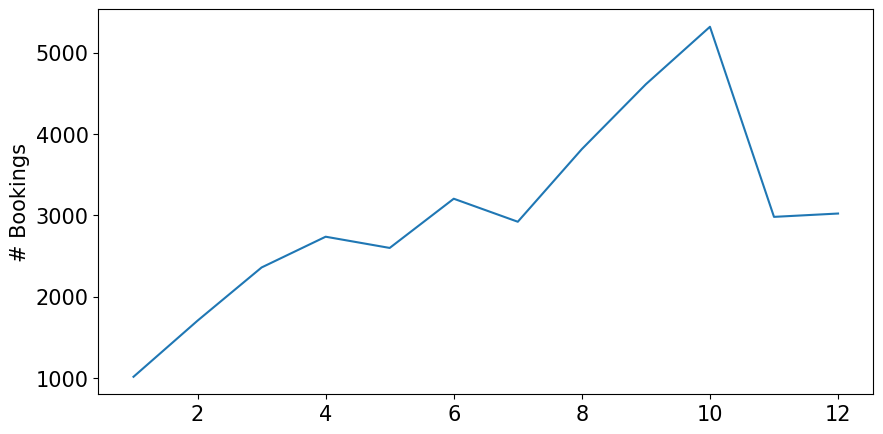

In [14]:
# visualizing the trend of number of bookings across months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Bookings")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('# Bookings', fontsize=15);

* The trend shows that the number of bookings rise from January to April, remain consistent from April to July, then rise again till October where it reaches a peak, and then drops down again in November and December

booking_status  Canceled  Not_Canceled    All
arrival_month                                
1                     24           990   1014
2                    430          1274   1704
3                    700          1658   2358
4                    995          1741   2736
5                    948          1650   2598
6                   1291          1912   3203
7                   1314          1606   2920
8                   1488          2325   3813
9                   1538          3073   4611
10                  1880          3437   5317
11                   875          2105   2980
12                   402          2619   3021
All                11885         24390  36275
------------------------------------------------------------------------------------------------------------------------


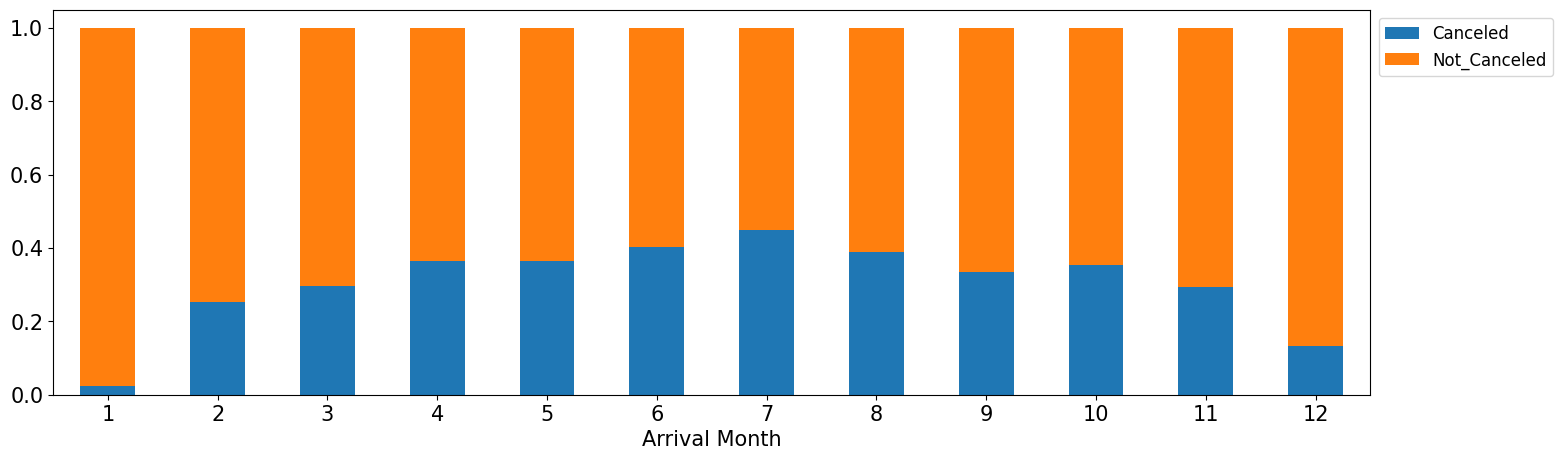

In [15]:
##Let's check the percentage of bookings canceled in each month
stacked_barplot(data, "arrival_month", "booking_status")

* January and December witness a significantly lower rate of cancellation compared to the other months, and July witnesses the highest rate of cancellation

January (2.5%) and December (10%) witness a significantly lower rate of cancellation compared to the other months (average 30%), while July (40%) witnesses the highest rate of cancellation

We also noted the following based on the EDA conducted:

The booking status does not significantly vary with the average price per room
The monthly booking trends show that the number of bookings rise from January to April, remain consistent from April to July, then rise again till October where it reaches a peak, and then drops down again in November and December

So, we need an ML model that can do the following:


*   Take the booking detail (customer arrival month, booking lead time, no. of guests, and more) as input
*   Learn the patterns in the input data
*   Fit a mathematical model using these patterns to identify which situations lead to booking cancellation
*   Predict the likelihood of cancellation of a new booking




## Data Preprocessing

Data preprocessing is a crucial step as it enables the following:

**Removing duplicate data:** If your data contains duplicate records, it can skew your results. For example, if you are trying to calculate the average sales of a product, and your data includes duplicate sales records, the average will be artificially inflated.

**Correcting errors:** If your data contains errors, it can lead to inaccurate results. For example, if your data includes a product with a price of 1000, but the correct price is actually 100, your analysis will be inaccurate.

**Filling in missing values:** If your data contains missing values, it can make it difficult to analyze. For example, if you are trying to calculate the average age of a group of people, and your data includes missing ages, you will not be able to calculate an accurate average.

**Transforming the data:** Sometimes, it is necessary to transform the data into a different format in order to make it easier to analyze. For example, if your data is in the form of text, you may need to convert it into numbers in order to perform statistical analysis. This is otherwise known as encoding categorical data.

In [17]:
# encoding the output (also called target) attribute
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

In [18]:
# separating the input and output variables
X = data.drop(["booking_status","arrival_date"], axis=1)
y = data["booking_status"]

# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)

# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [19]:
X.head()

,lead_time,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,arrival_month,market_segment_type_Online
0,224,0,65.00,2,1,0,2,10,False
1,5,1,106.68,2,2,0,3,11,True
2,1,0,60.00,1,2,0,1,2,True
3,211,0,100.00,2,0,0,2,5,True
4,48,0,94.50,2,1,0,1,4,True


## Model Training and Evaluation

Training an ML model is important because it allows machines to learn and perform tasks without explicit programming. It enables the following:

*   **Learning from Data:** ML models, such as machine learning and deep learning algorithms, learn patterns and make predictions based on data. Through training, the model can identify underlying patterns, correlations, and relationships in the data, enabling it to make accurate predictions or perform specific tasks.

*   **Generalization and Adaptability:** By training an ML model on diverse and
representative data, it can learn generalizable patterns and rules that can be applied to new, unseen data. A well-trained model can adapt and make accurate predictions or decisions on new data points it hasn't encountered before.

*   **Optimization and Performance Improvement:** During the training process, ML models adjust their internal parameters and weights to minimize errors or maximize performance on the training data. Training allows models to fine-tune their internal mechanisms to achieve the best possible performance on the given task.

In [20]:
# defining the ML model to build
model = DecisionTreeClassifier(random_state=1)

# training the ML model on the train data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [21]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [22]:
# confusion matrix for train data
confusion_matrix_sklearn(model, X_train, y_train)

ValueError: cannot reshape array of size 1 into shape (2,2)

In [23]:
# evaluating the model performance on the train data
model_train_predictions = model.predict(X_train)
model_train_score = f1_score(y_train, model_train_predictions)

print("Model Score on Train Data:", np.round(100*model_train_score, 2))

Model Score on Train Data: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


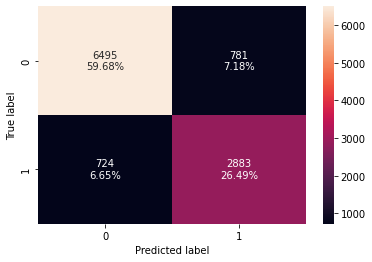

In [ ]:
# confusion matrix for test data
confusion_matrix_sklearn(model, X_test, y_test)

In [24]:
# evaluating the model performance on the test data
model_test_predictions = model.predict(X_test)
model_test_score = f1_score(y_test, model_test_predictions)

print("Model Score on Test Data:", np.round(100*model_test_score, 2))

Model Score on Test Data: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


## Observations from Model Evaluation

Our ML model has a score of 99% on the train data and 79% on the test data respectively.

- This shows that while the model work really well on the data it is trained on, it fails to replicate the same performance on unseen data.

- This becomes a worry as the ultimate goal would be to make predictions for new reservations that have not come in yet, and we do not want a model that will fail to perform well on such unseen data.

## Model Tuning

Model tuning is important for

- **Optimizing Performance**: Model tuning allows for finding the optimal configuration of hyperparameters to maximize the performance of the ML model. By systematically adjusting the hyperparameters, such as learning rate, regularization strength, or tree depth, it is possible to find the combination that yields the best results, improving the model's accuracy, precision, recall, or other performance metrics.

- **Determining the right fit**: Model tuning helps in finding the right set of model parameters that yield the best results. By tuning the model, it is possible to strike a balance and achieve an optimal level of complexity that  ensures that the model neither fails to capture the underlying patterns in the data nor learns the training data too well but fails to generalize to new data.

- **Adapting to Data Characteristics**: Model tuning allows for adapting the model to the specific characteristics of the data at hand. Different datasets may require different hyperparameter settings to achieve the best performance. By tuning the model, it becomes possible to adapt to data variations, handle different data distributions, or account for specific data properties, ultimately improving the model's ability to generalize and make accurate predictions.

In [28]:
# choosing the type of ML Model
dummy_model = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# defining the grid of parameters of the ML Model to choose from
parameters = {
    "max_leaf_nodes": [150, 250],
    "min_samples_split": [10, 30],
}

# defining the model score on which we want to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# running the model tuning algorithm
grid_obj = GridSearchCV(dummy_model, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics

In [29]:
# selecting the best combination of parameters for the model to create a new model
tuned_model = grid_obj.best_estimator_

# training the new ML Model
tuned_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=150,
                       min_samples_split=10, random_state=1)

In [30]:
# evaluating the model performance on the train data
tuned_model_train_predictions = tuned_model.predict(X_train)
tuned_model_train_score = f1_score(y_train, tuned_model_train_predictions)

print("Model Score on Train Data:", np.round(100*tuned_model_train_score, 2))

Model Score on Train Data: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [31]:
# evaluating the model performance on the test data
tuned_model_test_predictions = tuned_model.predict(X_test)
tuned_model_test_score = f1_score(y_test, tuned_model_test_predictions)

print("Model Score on Test Data:", np.round(100*tuned_model_test_score, 2))

Model Score on Test Data: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


- The train and test performances are much more similar now, so we can say that the model is able to generalize well

## Model Testing

Model testing is important for:

- **Validating model performance**: Testing helps assess how well the model performs under various conditions and scenarios.

- **Identifying and mitigating errors or flaws**: Testing helps uncover any errors, bugs, or weaknesses in the model.

- **Assessing model robustness and generalizability**: Testing helps evaluate the model's performance on new, unseen data.

- **Building user trust and confidence**: Model testing instills trust in the model's capabilities and predictions.

In [32]:
final_model = tuned_model

In [33]:
# evaluating the model performance on the test data
final_model_test_predictions = final_model.predict(X_test)
final_model_test_score = f1_score(y_test, final_model_test_predictions)

print("Model Score on Test Data:", np.round(100*final_model_test_score, 2))

Model Score on Test Data: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


## Model Deployment

Model deployment helps with the following:

- **Realizing Value**: Model deployment is necessary to derive value from the developed Data Science solution. By deploying the model into a production environment, businesses can leverage its capabilities to automate processes, make predictions, provide recommendations, or generate insights. Model deployment allows organizations to put their Data Science solution into action and start reaping the benefits.

- **Scalability and Efficiency**: Deploying a model enables scalability and efficiency in handling large volumes of data and making predictions or processing requests in real time. The model can be integrated into existing systems or applications, allowing for seamless and automated decision-making at scale. Deployment ensures that the Data Science solution can handle the demands of the operational environment effectively.

- **Continuous Learning and Improvement**: Model deployment facilitates the collection of real-world data, which can be used to monitor model performance and gather feedback. By continuously monitoring the model's output and gathering user feedback, organizations can iteratively improve the model, enhance its accuracy, and adapt it to changing conditions. Deployment allows for ongoing learning and refinement of the Data Science solution.

- **Business Impact and Decision Support**: Deployed models provide valuable insights and predictions that support decision-making processes. By integrating Data Science into business operations, organizations can leverage the model's outputs to make informed decisions, optimize processes, improve customer experiences, and gain a competitive edge. Model deployment enables the practical utilization of Data Science for generating business impact.

In [34]:
# exporting the final model to the disk
joblib.dump(final_model, 'hotel_cancellation_prediction_model_v1_0.joblib')

['hotel_cancellation_prediction_model_v1_0.joblib']

In [35]:
# loading the final model from the disk
cancellation_predictor = joblib.load('hotel_cancellation_prediction_model_v1_0.joblib')

In [36]:
# define a function that will take the necessary inputs and make predictions

def predict_cancellation(lead_time, market_segment_type, avg_price_per_room, no_of_adults, no_of_weekend_nights, no_of_week_nights, no_of_special_requests, arrival_month, required_car_parking_space):

    # dictionary of inputs
    input_data = {
        'lead_time': lead_time,
        'no_of_special_requests': no_of_special_requests,
        'avg_price_per_room': avg_price_per_room,
        'no_of_adults': no_of_adults,
        'no_of_weekend_nights': no_of_weekend_nights,
        'required_car_parking_space': 1.0 if required_car_parking_space == "Yes" else 0.0,
        'no_of_week_nights': no_of_week_nights,
        'arrival_month': arrival_month,
        'market_segment_type_Online': 1 if market_segment_type == 'Online' else 0,
    }

    # create a dataframe using the dictionary of inputs
    data_point = pd.DataFrame([input_data])

    # predicting the output and probability of the output
    prediction = cancellation_predictor.predict(data_point).tolist()
    prediction_prob = np.round(100*cancellation_predictor.predict_proba(data_point)[0][0], 2) if prediction == 1 else np.round(100*cancellation_predictor.predict_proba(data_point)[0][1], 2)

    # returning the final output
    return ("Yes", str(prediction_prob)+"%") if prediction[0] == 1 else ("No", str(prediction_prob)+"%")

In [ ]:
# creating the deployment input interface
model_inputs = [
    gr.inputs.Number(label="Lead Time"),
    gr.inputs.Dropdown(label="Market Segment Type", choices=["Online", "Offline"]),
    gr.inputs.Number(label="Average Price per Room"),
    gr.inputs.Number(label="Number of Adults"),
    gr.inputs.Number(label="Number of Weekend Nights"),
    gr.inputs.Number(label="Number of Week Nights"),
    gr.inputs.Number(label="Number of Special Requests"),
    gr.inputs.Dropdown(label="Arrival Month", choices=np.arange(1,13,1).tolist()),
    gr.inputs.Dropdown(label="Required Car Parking Space", choices=["Yes", "No"])
]

# creating the deployment output interface
model_outputs = [
    gr.Textbox(label="Will the booking be cancelled?"),
    gr.Textbox(label="Chances of Cancellation")
]

In [ ]:
# defining the structure of the deployment interface and how the components will interact
demo = gr.Interface(
    fn = predict_cancellation,
    inputs = model_inputs,
    outputs = model_outputs,
    allow_flagging='never',
    title = "Hotel Booking Cancellation Predictor",
    description = "This interface will predict whether a given hotel booking is likely to be cancelled based on the details of the booking.",
)

In [ ]:
# deploying the model
demo.launch(inline=False, share=True, debug=True)

In [ ]:
# shutting down the deployed model
demo.close()

### Dashboard for the Data Team

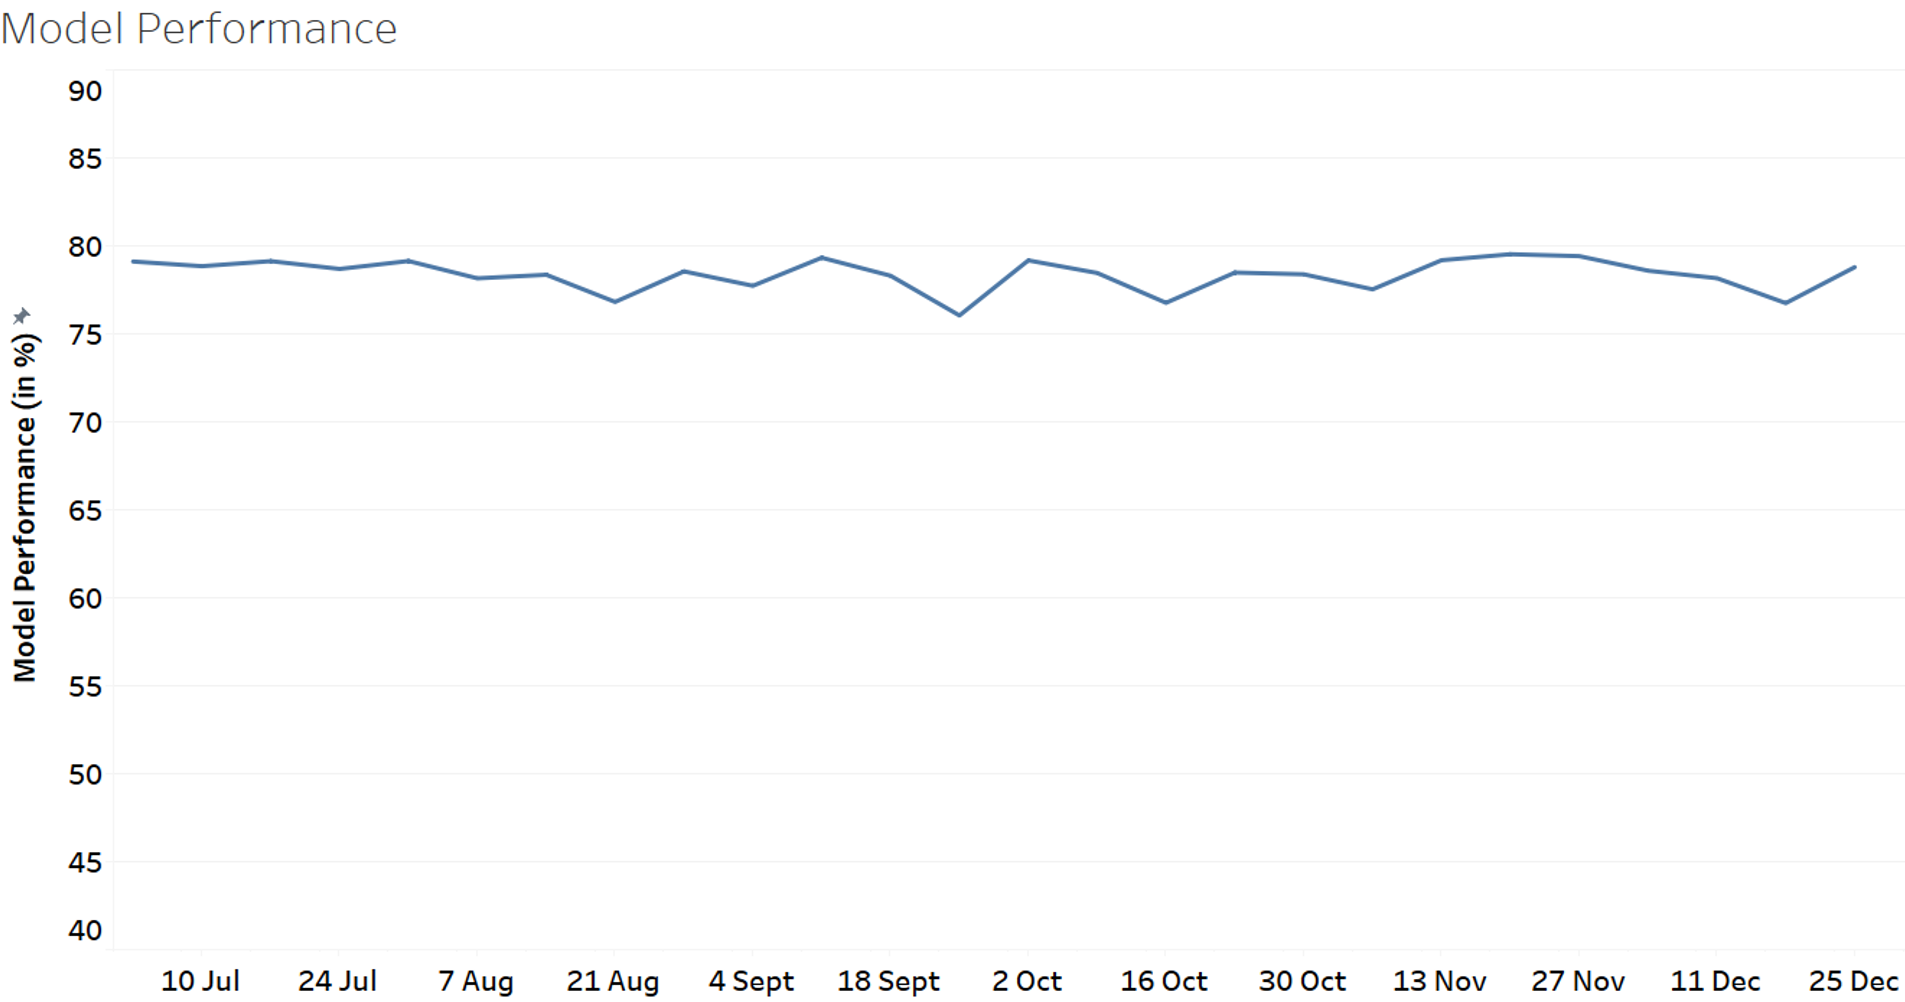

### Dashboard for the Property Manager

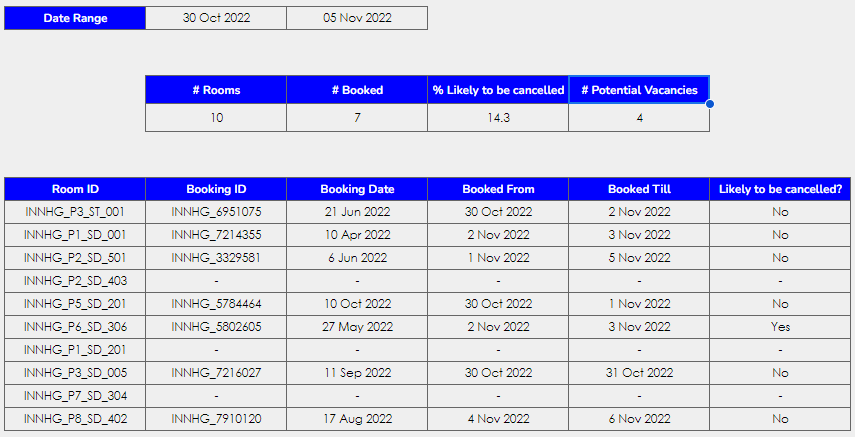

### Dashboard for the Leadership

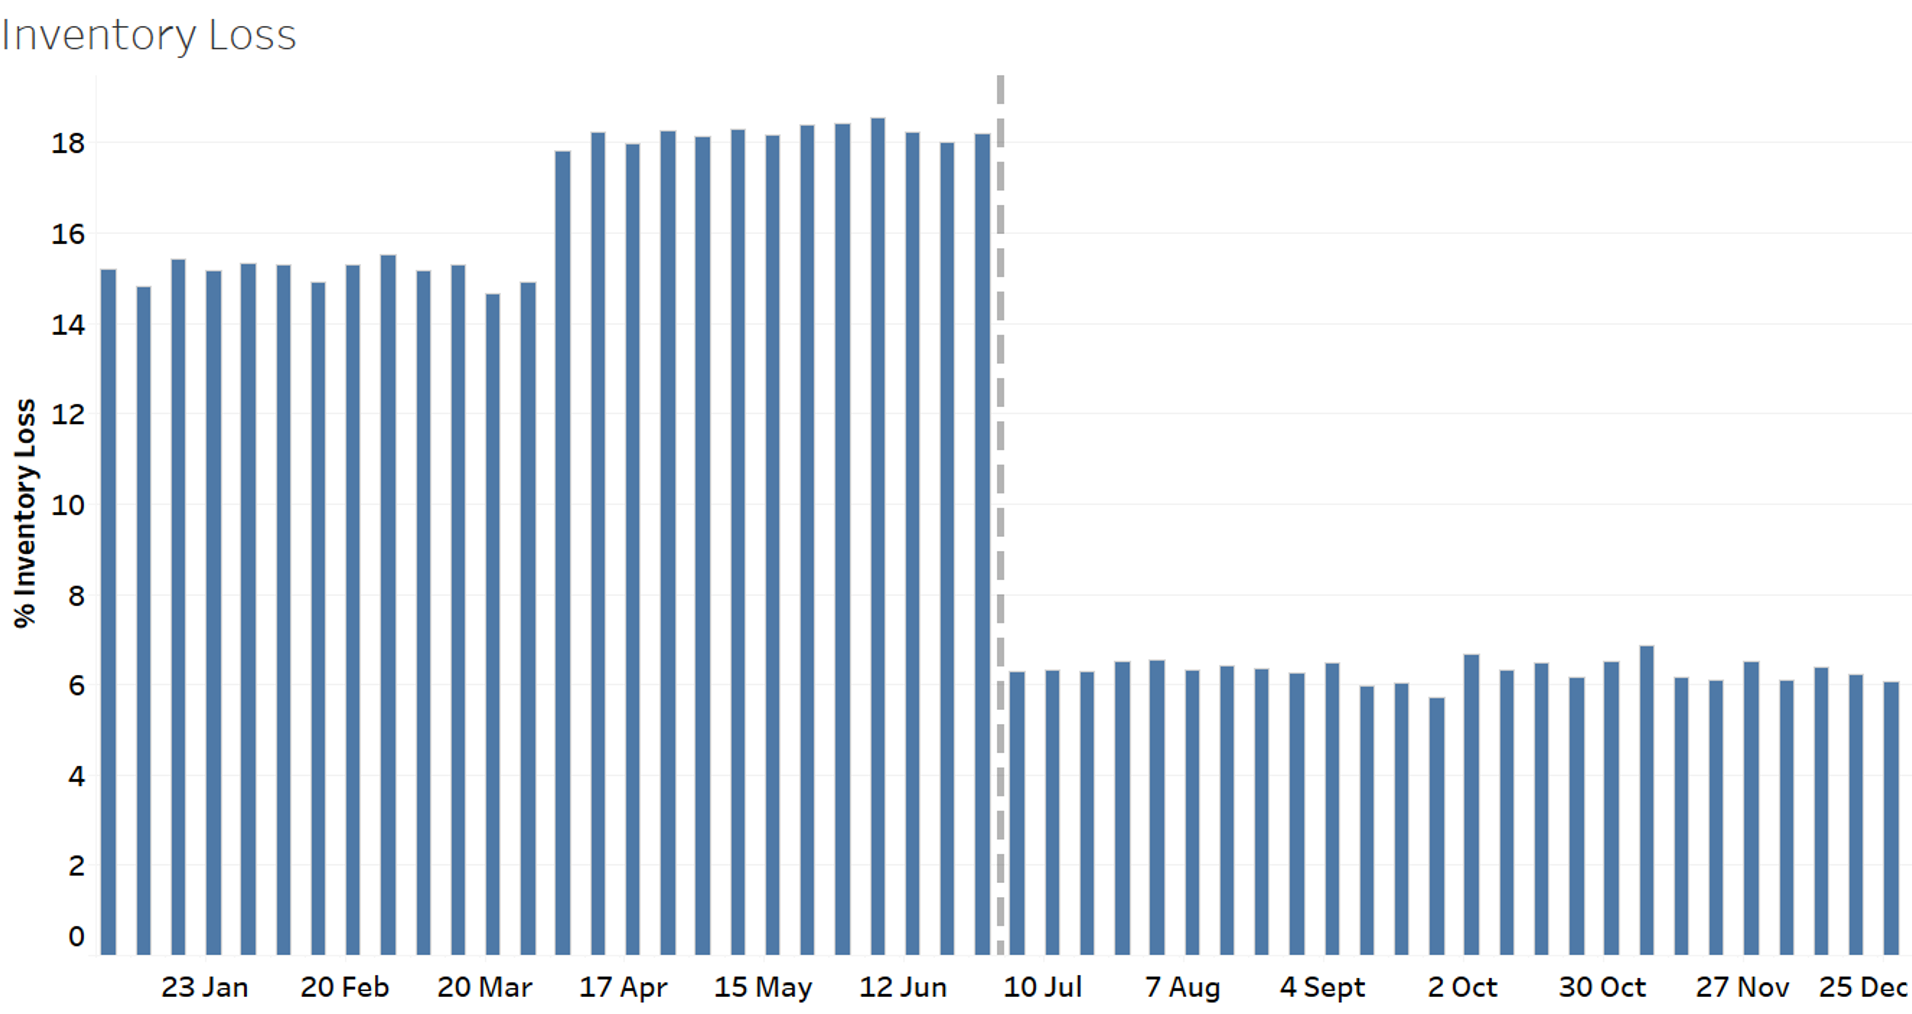

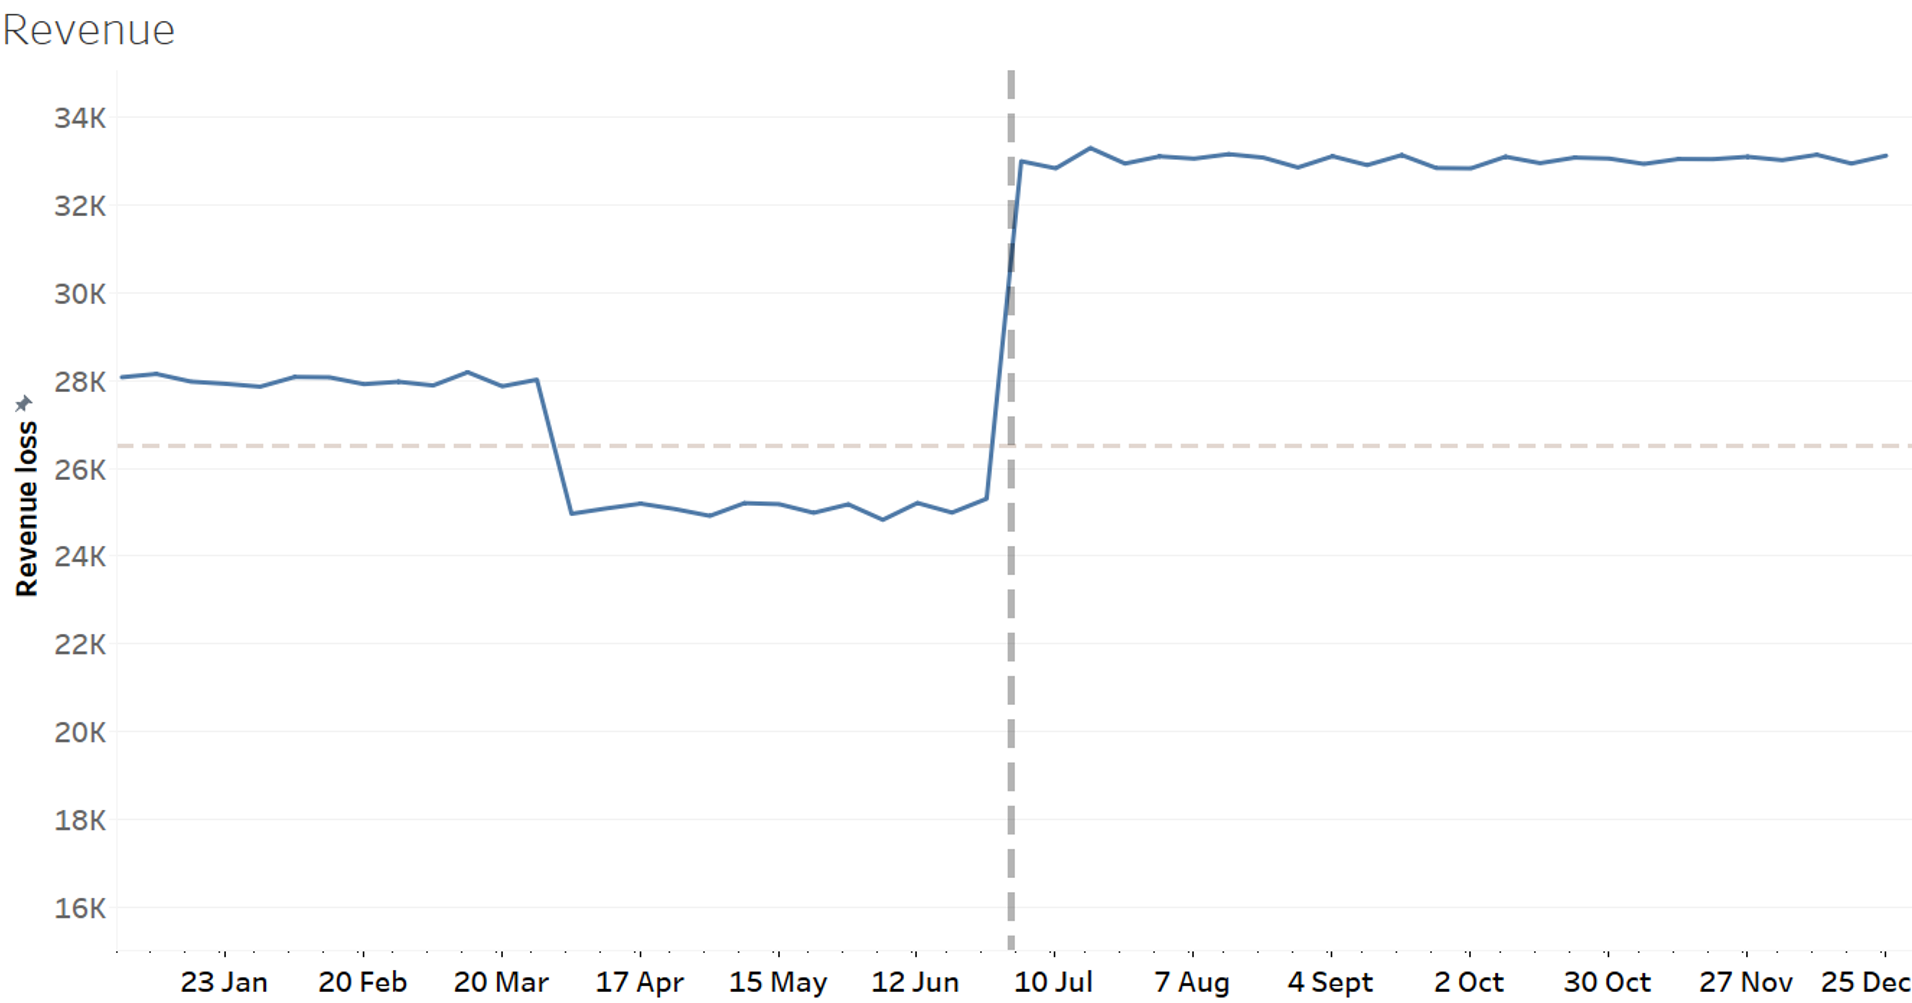

We have built an ML model, tested it, deployed it, and used the model's outputs to visualize the important business metrics via dashboards. Now the final step is to use the ML model for decision-making and determine the impact of implementing the Data Science solution.



**The trends of model performance along with the revenue loss incurred is useful for the Data Team.** They can use it to

- monitor the model's performance over time
- correlate it with financial numbers to gauge the  business impact
- set thresholds for the acceptable lower limit of model performance
- decide when to retrain the model

**The property manager can use the dashboard to**
- understand the current status of bookings over a date range
- identify the number of potential vacancies due to likely cancellations
- decide when to stop taking further bookings to avoid overbooking

**The leadership can use the dashboard to understand the impact of the Data Science solution in**
- reducing cancellations
- increasing revenue

**Let's assess the financial impact of our Data Science solution.**

- In the six months prior to the Data Science solution, the revenue stood at \$0.7 million
- Post implementation of the Data Science solution, the revenue over the next 6 months stood at \$0.85 million
- So, **the Data Science solution has helped in increase the revenue by ~21%**